In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from scipy.stats import zscore

In [3]:
df=pd.read_csv("E:\\HR.csv")
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


___EXPLORATORY DATA ANALYSIS

In [7]:
df.shape

(1470, 35)

this dataset has 1470 rows 35 columns

In [4]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

The features 'Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime',over18 are object type remainiong all are integer type

__Handling null values

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

This dataset has no null values

In [24]:
for col in df:
    print(col)
    print(df[col].value_counts())
    print()

Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
53    19
48    19
51    19
52    18
54    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

DailyRate
691     6
1082    5
408     5
329     5
530     5
       ..
708     1
713     1
717     1
719     1
1499    1
Name: DailyRate, Length: 886, dtype: int64

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

DistanceFromHome
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5     

displaying value count of unique value in each feature.To identify coloums having single unique value

In [6]:
df['StandardHours'].unique

<bound method Series.unique of 0       80
1       80
2       80
3       80
4       80
        ..
1465    80
1466    80
1467    80
1468    80
1469    80
Name: StandardHours, Length: 1470, dtype: int64>

In [8]:
df['EmployeeCount'].unique

<bound method Series.unique of 0       1
1       1
2       1
3       1
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: EmployeeCount, Length: 1470, dtype: int64>

<AxesSubplot:xlabel='Over18', ylabel='count'>

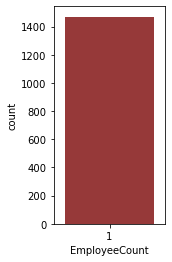

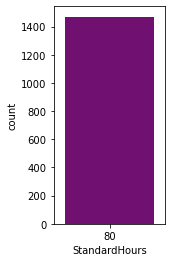

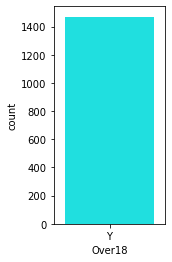

In [16]:
plt.figure(figsize=(2,4))
sns.countplot(df.EmployeeCount,color="brown")

plt.figure(figsize=(2,4))
sns.countplot(df.StandardHours,color="purple")

plt.figure(figsize=(2,4))
sns.countplot(df.Over18,color=(0,1,1))

The features standardhours,over18 and employeecount has only one value so it wont create any impact on the target feature Attrition.

In [4]:
cols=['StandardHours','Over18','EmployeeCount']
df_new=df.drop(cols,axis=1)

All the three columns having single value so I'm dropping it from the given dataset

In [4]:
df_new.shape

(1470, 32)

__BI VARIATE ANALYSIS

Categorical columns vs Target

<AxesSubplot:xlabel='Attrition', ylabel='count'>

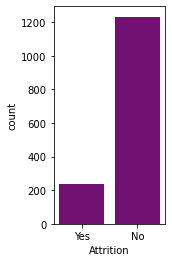

In [112]:
plt.figure(figsize=(2,4))
sns.countplot(df.Attrition,color="purple")

the target coloumn attrition has two values 0 and 1.It has class imbalance

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

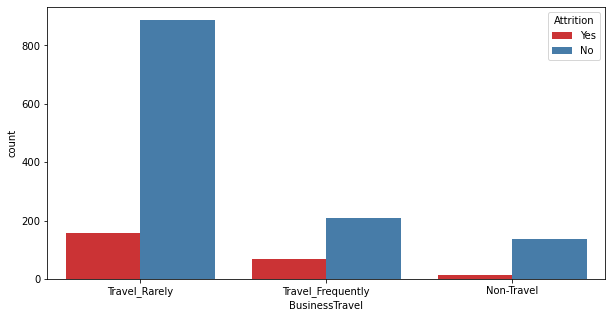

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(df.BusinessTravel,palette="Set1",hue=df.Attrition)

from the above plot its apparent that comparitively the employees who travel rarely will not resign their job

<AxesSubplot:ylabel='Department'>

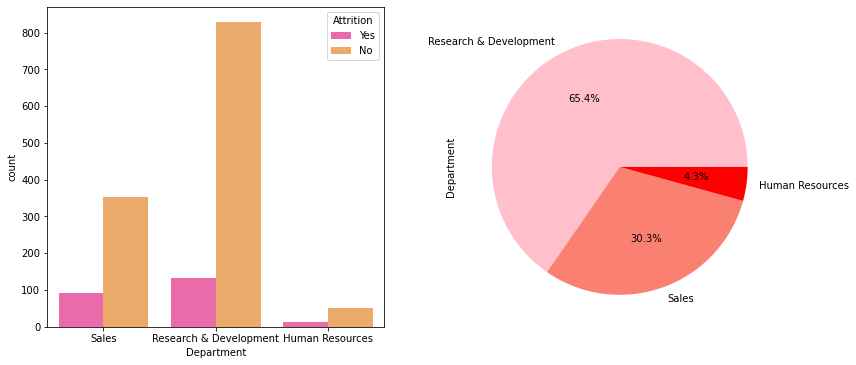

In [252]:
plt.figure(figsize=(35,20))
rows = 3
cols = 5
i=0
i+=1
plt.subplot(rows,cols,i)
sns.countplot(df.Department,palette="spring",hue=df.Attrition)
i+=1
color_l=['pink','salmon','red']
plt.subplot(rows,cols,i)
df['Department'].value_counts('Life Sciences').plot.pie(autopct='%1.1f%%',colors=color_l)

from the above plot its apparent that comparitively the employees who belongs to Research and Developement will like to continue their job.The majority percentage(65.4%) of employee belongs to R&D department 

<AxesSubplot:ylabel='EducationField'>

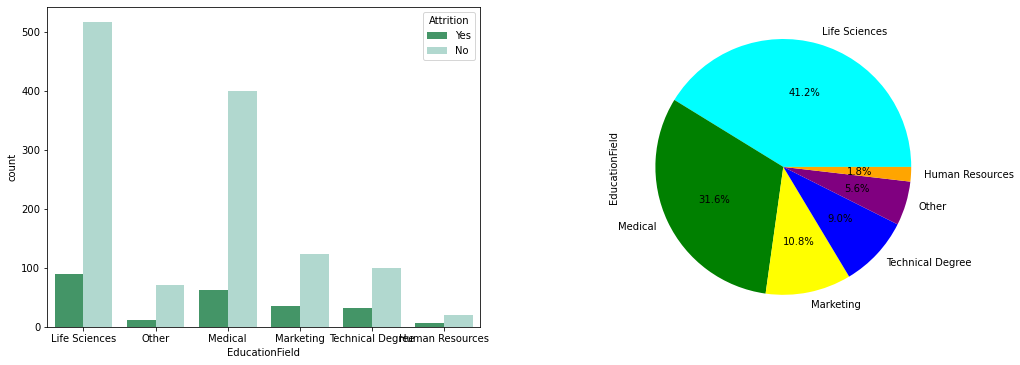

In [20]:
plt.figure(figsize=(45,20))
rows = 3
cols = 5
i=0
color_l=['cyan','green','yellow','blue','purple','orange']
i+=1
plt.subplot(rows,cols,i)
sns.countplot(df['EducationField'],palette="BuGn_r",hue=df.Attrition)


i+=1
plt.subplot(rows,cols,i)
df['EducationField'].value_counts('Life Sciences').plot.pie(autopct='%1.1f%%',colors=color_l)

from the above plot its apparent that comparitively the employees who belongs to both lifesciece and medical field are not resigning their job.The majority of employee belongs to Lifesciences and Medical field

In [62]:
print(df['EducationField'].value_counts())

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


most of the employees belongs to life science education field and medical field.employees leaving job from the fields life science and education field is very less compare to other fields.

Employees from marketing field and technical degree approximately 25% employees are leaving

<AxesSubplot:ylabel='Gender'>

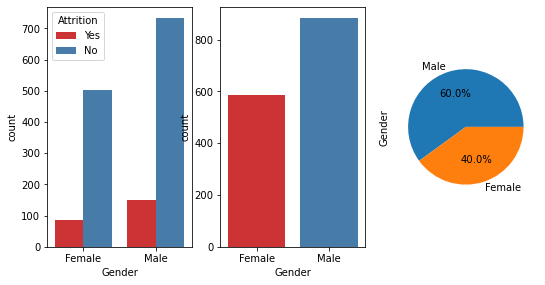

In [72]:
plt.figure(figsize=(15,15))
rows = 3
cols = 5
i=0
i += 1
plt.subplot(rows,cols,i)
sns.countplot(df.Gender,palette="Set1",hue=df.Attrition)

i += 1
plt.subplot(rows,cols,i)
sns.countplot(df.Gender,palette="Set1")

i += 1
plt.subplot(rows,cols,i)
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%')

comparing the percentage of attrition out of 588 female only 88 people are quitting it means ((((588-88)/588)*100)) 15% female are leaving but in male out of 882 people more than 150 peple are quitting it means(((882-150)/882)*100)18% male are leaving

<AxesSubplot:ylabel='JobRole'>

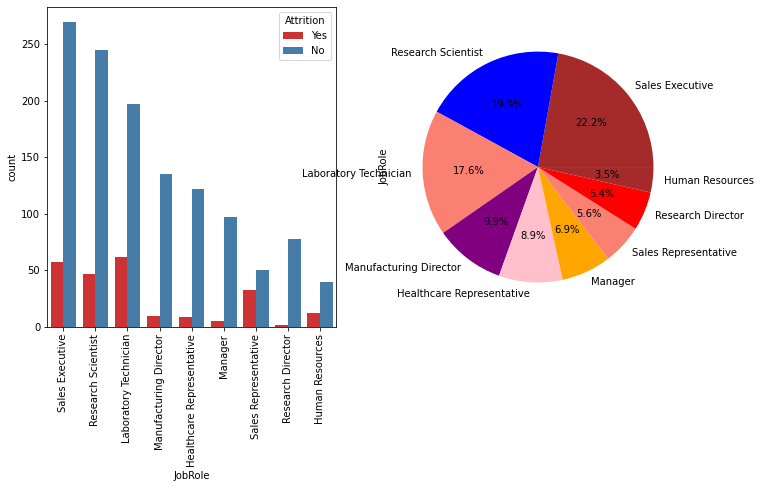

In [30]:
plt.figure(figsize=(30,20))
rows = 3
cols = 5
i=0
color_l=['brown','blue','salmon','purple','pink','orange','salmon','red']
i+=1
plt.subplot(rows,cols,i)
l = list(df['JobRole'].unique())
chart = sns.countplot(df["JobRole"],palette="Set1",hue=df.Attrition)
chart.set_xticklabels(labels=l, rotation=90)
i+=1
plt.subplot(rows,cols,i)
df['JobRole'].value_counts().plot.pie(autopct='%1.1f%%',colors=color_l)

Attrition rate is lower in salesexecutive and research scientist roles

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


<AxesSubplot:ylabel='MaritalStatus'>

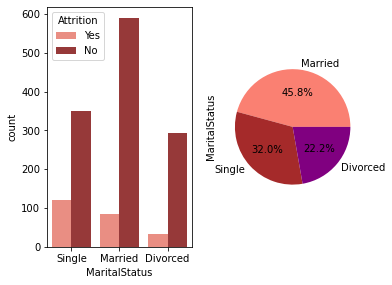

In [12]:
color_l=['salmon','brown','purple']
plt.figure(figsize=(15,15))
rows = 3
cols = 5
i=0
i += 1
plt.subplot(rows,cols,i)
sns.countplot(df.MaritalStatus,palette=color_l,hue=df.Attrition)

print(df['MaritalStatus'].value_counts())
i += 1
plt.subplot(rows,cols,i)
df['MaritalStatus'].value_counts().plot.pie(autopct='%1.1f%%',colors=color_l)

from this above chart its apparent that employees who all are married are having less attrition rate

No     1054
Yes     416
Name: OverTime, dtype: int64


<AxesSubplot:ylabel='OverTime'>

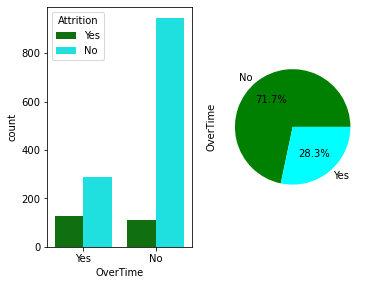

In [16]:
color_l=['green','cyan','blue']
plt.figure(figsize=(15,15))
rows = 3
cols = 5
i=0
i += 1
plt.subplot(rows,cols,i)
sns.countplot(df.OverTime,palette=color_l,hue=df.Attrition)

print(df['OverTime'].value_counts())

i += 1
plt.subplot(rows,cols,i)
df['OverTime'].value_counts().plot.pie(autopct='%1.1f%%',colors=color_l)

Employees who all are not working overtime has low attrition rate


28.3% employees are willing to work in overtime

ORDINAL DATA VS ATTRITION

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64


<AxesSubplot:ylabel='WorkLifeBalance'>

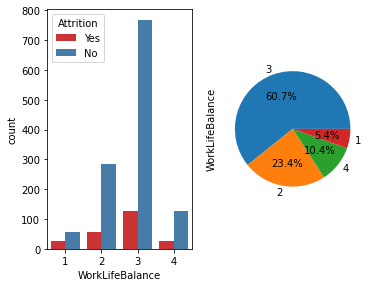

In [17]:
plt.figure(figsize=(15,15))
rows = 3
cols = 5
i=0
i += 1
plt.subplot(rows,cols,i)
sns.countplot(df.WorkLifeBalance,palette="Set1",hue=df.Attrition)

print(df['WorkLifeBalance'].value_counts())

i += 1
plt.subplot(rows,cols,i)
df['WorkLifeBalance'].value_counts().plot.pie(autopct='%1.1f%%')

from the above chart its apparent that the employees who all are having above average worklife balance are having less attrition rate

<AxesSubplot:ylabel='Education'>

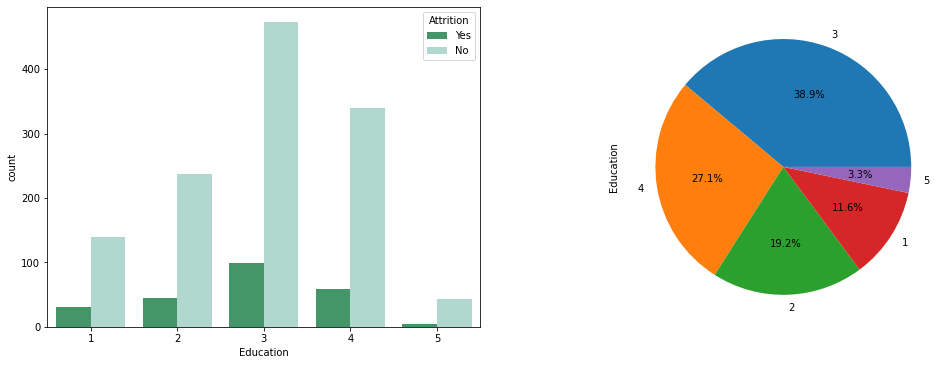

In [5]:
plt.figure(figsize=(45,20))
rows = 3
cols = 5
i=0

i+=1
plt.subplot(rows,cols,i)
sns.countplot(df['Education'],palette="BuGn_r",hue=df.Attrition)


i+=1
plt.subplot(rows,cols,i)
df['Education'].value_counts('Life Sciences').plot.pie(autopct='%1.1f%%')

 The employees of 38.9% belongs to education category 3.compare to other category 3 has less percentange of people moving out of the company

[Text(0, 0, '2'), Text(1, 0, '3'), Text(2, 0, '4'), Text(3, 0, '1')]

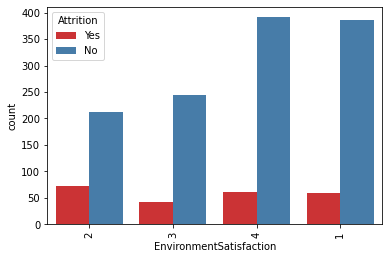

In [32]:
l = list(df['EnvironmentSatisfaction'].unique())
chart = sns.countplot(df["EnvironmentSatisfaction"],palette="Set1",hue=df.Attrition)
chart.set_xticklabels(labels=l, rotation=90)

from the above chart its apparent that both the employee who having high satisfaction and low satisfaction are having low Attrition rate.so we cannot predict the target coloumn with this value

[Text(0, 0, '3'), Text(1, 0, '2'), Text(2, 0, '4'), Text(3, 0, '1')]

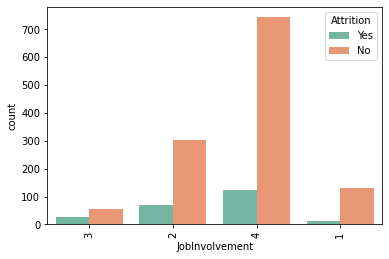

In [33]:
l = list(df['JobInvolvement'].unique())
chart = sns.countplot(df["JobInvolvement"],palette="Set2",hue=df.Attrition)
chart.set_xticklabels(labels=l, rotation=90)

from the above chart its apparent that the employee who all are highly involved in the job having low Attrition rate

[Text(0, 0, '2'),
 Text(1, 0, '1'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5')]

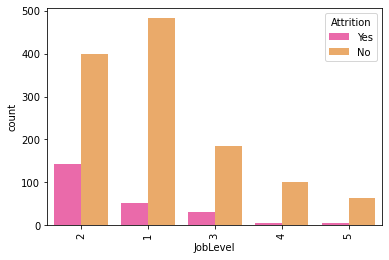

In [36]:
l = list(df['JobLevel'].unique())
chart = sns.countplot(df["JobLevel"],palette="spring",hue=df.Attrition)
chart.set_xticklabels(labels=l, rotation=90)

from the above chart its apparent that the entry level employees are having low Attrition rate.

[Text(0, 0, '4'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '1')]

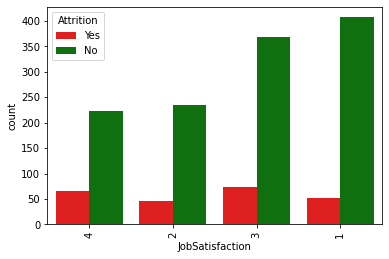

In [52]:
l = list(df['JobSatisfaction'].unique())
col_l=["red","green"]
chart = sns.countplot(df["JobSatisfaction"],palette=col_l,hue=df.Attrition)
chart.set_xticklabels(labels=l, rotation=90)

from the above chart its apparent that the employee who having high job satisfaction and low job satisfaction are having low Attrition rate.so we cannot predict the target coloumn with this value

[Text(0, 0, '8'),
 Text(1, 0, '1'),
 Text(2, 0, '6'),
 Text(3, 0, '9'),
 Text(4, 0, '0'),
 Text(5, 0, '4'),
 Text(6, 0, '5'),
 Text(7, 0, '2'),
 Text(8, 0, '7'),
 Text(9, 0, '3')]

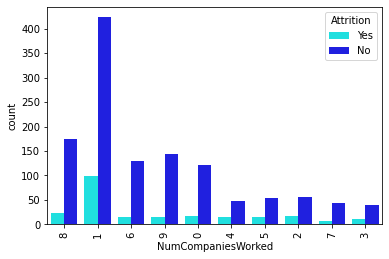

In [51]:
l = list(df['NumCompaniesWorked'].unique())
col_l=["cyan","blue"]
chart = sns.countplot(df["NumCompaniesWorked"],palette=col_l,hue=df.Attrition)
chart.set_xticklabels(labels=l, rotation=90)

from the above chart its apparent that both the employee who having high satisfaction and low satisfaction are having low Attrition rate.so we cannot predict the target coloumn with this value

from the above chart its apparent that the employees who worked in only one company are having low Attrition rate.

[Text(0, 0, '11'),
 Text(1, 0, '23'),
 Text(2, 0, '15'),
 Text(3, 0, '12'),
 Text(4, 0, '13'),
 Text(5, 0, '20'),
 Text(6, 0, '22'),
 Text(7, 0, '21'),
 Text(8, 0, '17'),
 Text(9, 0, '14'),
 Text(10, 0, '16'),
 Text(11, 0, '18'),
 Text(12, 0, '19'),
 Text(13, 0, '24'),
 Text(14, 0, '25')]

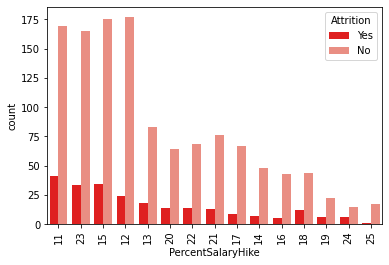

In [49]:
l = list(df['PercentSalaryHike'].unique())
col_l=["red","salmon"]
chart = sns.countplot(df["PercentSalaryHike"],palette=col_l,hue=df.Attrition)
chart.set_xticklabels(labels=l, rotation=90)

the employees who all are got hike 11 to 15% are having less attrition rate.the employees who got hike between 18 t0 20% having high attrition rate .we can predict the target column using this feature

[Text(0, 0, '3'), Text(1, 0, '4')]

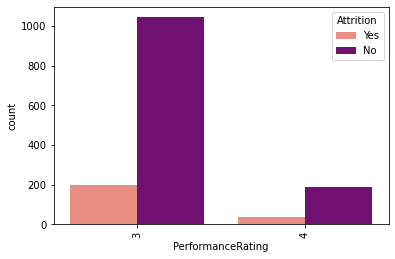

In [50]:
l = list(df['PerformanceRating'].unique())
col_l=["salmon","purple"]
chart = sns.countplot(df["PerformanceRating"],palette=col_l,hue=df.Attrition)
chart.set_xticklabels(labels=l, rotation=90)

In [ ]:
the employees who got performance rating as 3 are having less attrition rate.

[Text(0, 0, '1'), Text(1, 0, '4'), Text(2, 0, '2'), Text(3, 0, '3')]

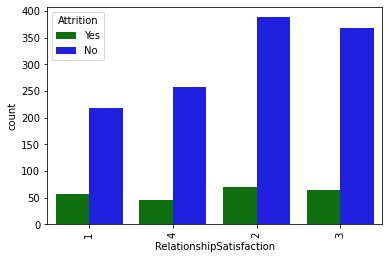

In [55]:
l = list(df['RelationshipSatisfaction'].unique())
col_l=["green","blue"]
chart = sns.countplot(df["RelationshipSatisfaction"],palette=col_l,hue=df.Attrition)
chart.set_xticklabels(labels=l, rotation=90)

from the above chart its apparent that the employee who having high relationship satisfaction and low relationship satisfaction are having low Attrition rate.so we cannot predict the target coloumn with this value

[Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '3'), Text(3, 0, '2')]

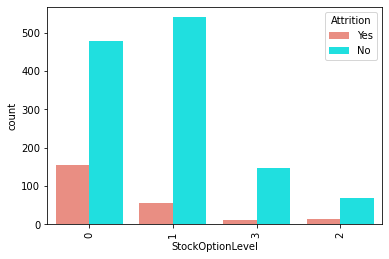

In [54]:
l = list(df['StockOptionLevel'].unique())
col_l=["salmon","cyan"]
chart = sns.countplot(df["StockOptionLevel"],palette=col_l,hue=df.Attrition)
chart.set_xticklabels(labels=l, rotation=90)

the employees who having less stocks are having low attrition rate.

[Text(0, 0, '0'),
 Text(1, 0, '3'),
 Text(2, 0, '2'),
 Text(3, 0, '5'),
 Text(4, 0, '1'),
 Text(5, 0, '4'),
 Text(6, 0, '6')]

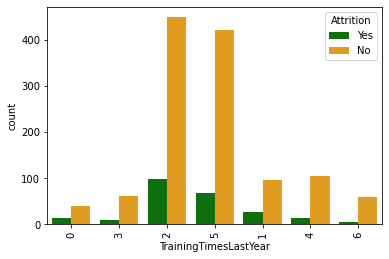

In [113]:
l = list(df['TrainingTimesLastYear'].unique())
col_l=["green","orange"]
chart = sns.countplot(df["TrainingTimesLastYear"],palette=col_l,hue=df.Attrition)
chart.set_xticklabels(labels=l, rotation=90)


Employee who are trained 2 and 5 times a year are having less attrition rate

___Numerical Data vs Atrition

In [124]:
df['HourlyRate'].value_counts()

66    29
42    28
98    28
84    28
48    28
      ..
69    15
53    14
68    14
38    13
34    12
Name: HourlyRate, Length: 71, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='HourlyRate'>

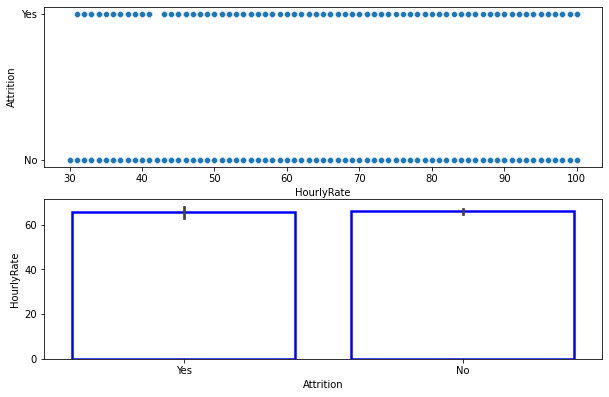

In [170]:
plt.figure(figsize=(10,10))
rows = 3
cols = 1
i=0
i += 1
plt.subplot(rows,cols,i)
sns.scatterplot(df.HourlyRate,df.Attrition)

i += 1
plt.subplot(rows,cols,i)
sns.barplot(df['Attrition'],df['HourlyRate'],linewidth=2.5, facecolor=(1, 1, 1, 0), edgecolor="blue")


HourlyRate is not an important feature to create impact on Attrition feature

<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

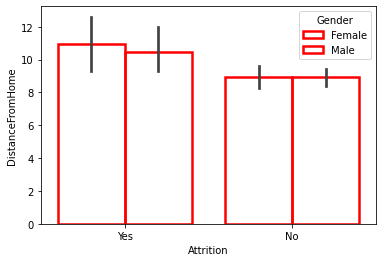

In [157]:
sns.barplot(df['Attrition'],df['DistanceFromHome'],linewidth=2.5, facecolor=(1, 1, 1, 0), edgecolor="red",hue=df.Gender)

Distance from home is not an important feature to create impact on Attrition feature.Distance from home is not impact on gender

In [179]:
df['MonthlyRate'].value_counts()

4223     3
9150     3
9096     2
13008    2
12858    2
        ..
17071    1
23213    1
3835     1
25258    1
12287    1
Name: MonthlyRate, Length: 1427, dtype: int64

<AxesSubplot:xlabel='MonthlyRate', ylabel='Attrition'>

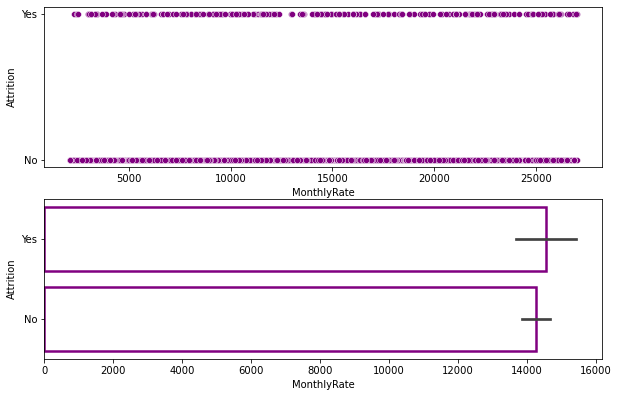

In [178]:
plt.figure(figsize=(10,10))
rows = 3
cols = 1
i=0
i += 1
plt.subplot(rows,cols,i)
sns.scatterplot(df.MonthlyRate,df.Attrition,color="purple")

i += 1
plt.subplot(rows,cols,i)
sns.barplot(df['MonthlyRate'],df['Attrition'],linewidth=2.5, facecolor=(1, 1, 1, 0), edgecolor="purple")

Employees having low monthlyrate are mostly resigning their job

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Attrition'>

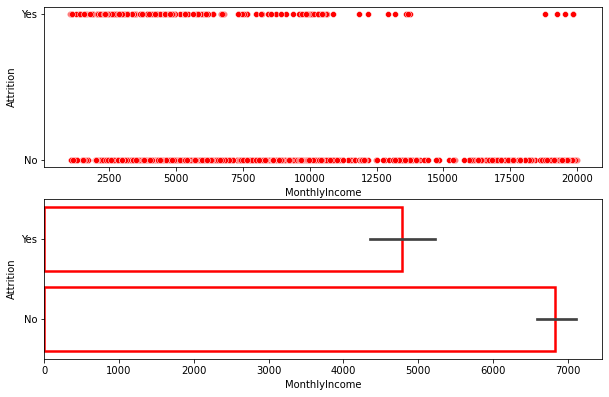

In [175]:
plt.figure(figsize=(10,10))
rows = 3
cols = 1
i=0
i += 1
plt.subplot(rows,cols,i)
sns.scatterplot(df.MonthlyIncome,df.Attrition,color="red")

i += 1
plt.subplot(rows,cols,i)
sns.barplot(df['MonthlyIncome'],df['Attrition'],linewidth=2.5, facecolor=(1, 1, 1, 0), edgecolor="red")

Employees having low monthly income are mostly resigning their job

In [ ]:
___Handling Outliers

<AxesSubplot:xlabel='MonthlyIncome'>

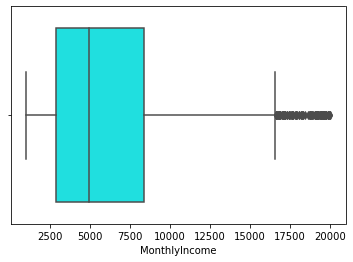

In [7]:
sns.boxplot(df['MonthlyIncome'],color="cyan")

<AxesSubplot:xlabel='MonthlyRate'>

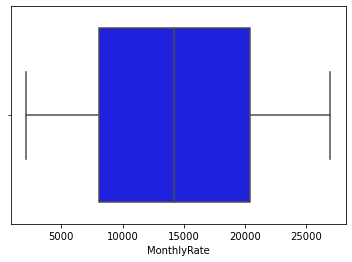

In [8]:
sns.boxplot(df['MonthlyRate'],color="blue")

<AxesSubplot:xlabel='DailyRate'>

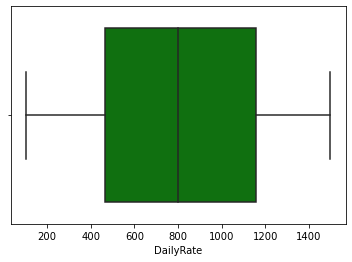

In [9]:
sns.boxplot(df['DailyRate'],color="green")

<AxesSubplot:xlabel='HourlyRate'>

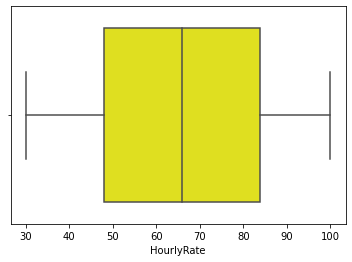

In [10]:
sns.boxplot(df['HourlyRate'],color="yellow")

In [11]:
z1 = np.abs(stats.zscore(df_new['MonthlyIncome']))
print(z1)

[0.10834951 0.29171859 0.93765369 ... 0.07669019 0.23647414 0.44597809]


In [14]:
df_new['MonthlyIncome'] = df_new.MonthlyIncome[(z1<3)]
df_new.shape

(1470, 32)

_outliers are removed from numerical data monthly income 

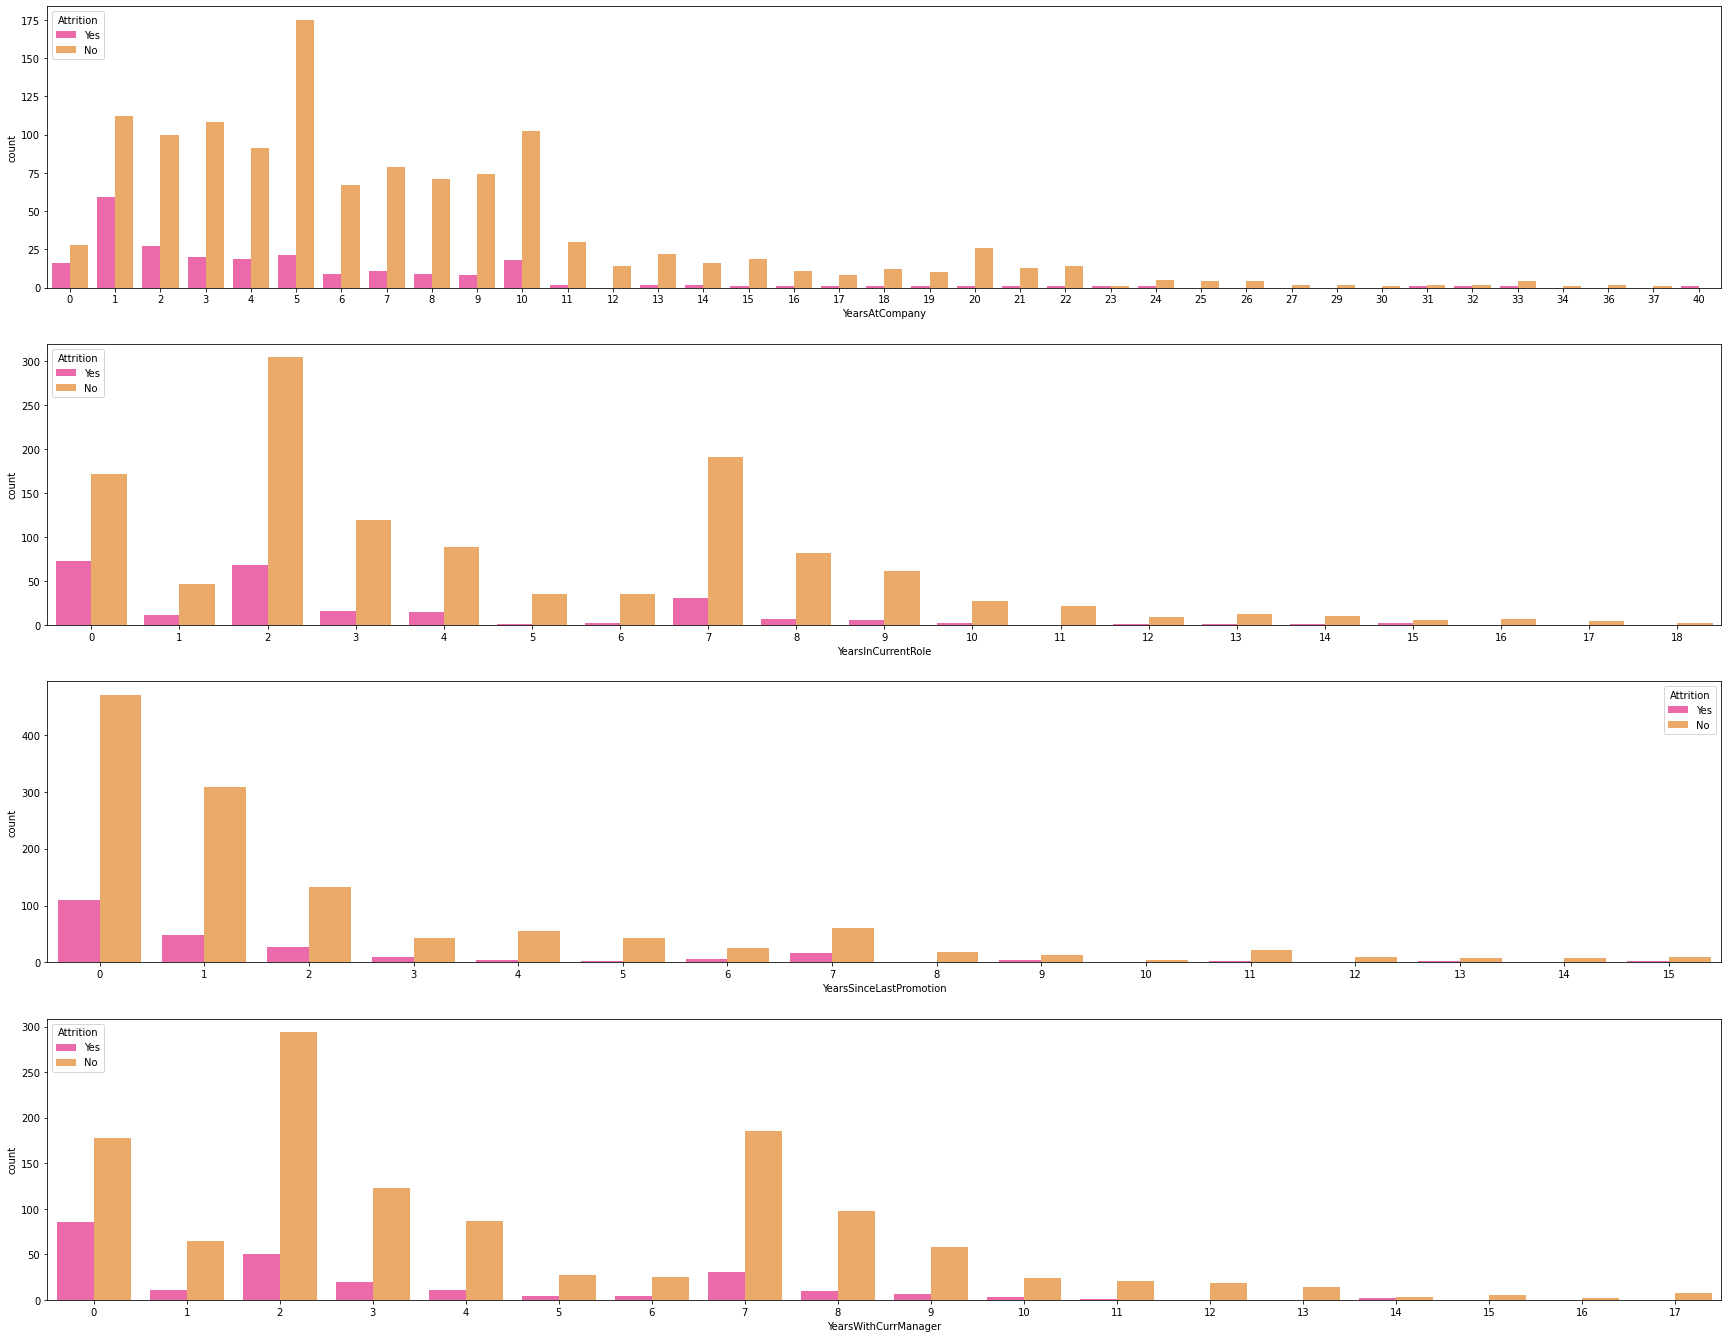

In [115]:
l =['YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
ncol=1
nrows=5
plt.figure(figsize=(30,30))
for i in range(0,4):
    plt.subplot(nrows,ncol,i+1)
    sns.countplot(x=l[i],data=df,palette="spring",hue=df.Attrition)

if the employee is in their 5th year with company with same manager are not quitting the job

<AxesSubplot:xlabel='Age', ylabel='MaritalStatus'>

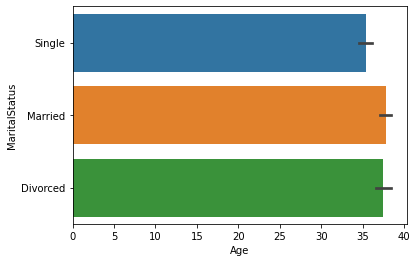

In [76]:
sns.barplot(df["Age"],df['MaritalStatus'])


___EDA CONCLUSION:

employees who belongs to below category having less attrion rate
    
>travel rarely,R&D department,who belongs to lifescience and medical field,female,sales executive and research scientists,married,not working over time,moderate work life balance,high job involvement,working in single company,performance rating:3 and employees who having no or less stocks,low monthly income.

>we cannot predict using relationship satisfaction,job satisfaction,Environment satisfaction features

___FEATURE ENGINEERING

In [ ]:
Encoding all categorical coloumn into numerical column using label encoding technique

In [22]:
data_clean=df_new
col_encod=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']

In [23]:
from sklearn import preprocessing 
for col in col_encod:
    label = preprocessing.LabelEncoder()
    data_clean[col]= label.fit_transform(df_new[col])

In [24]:
data_clean.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2


<AxesSubplot:>

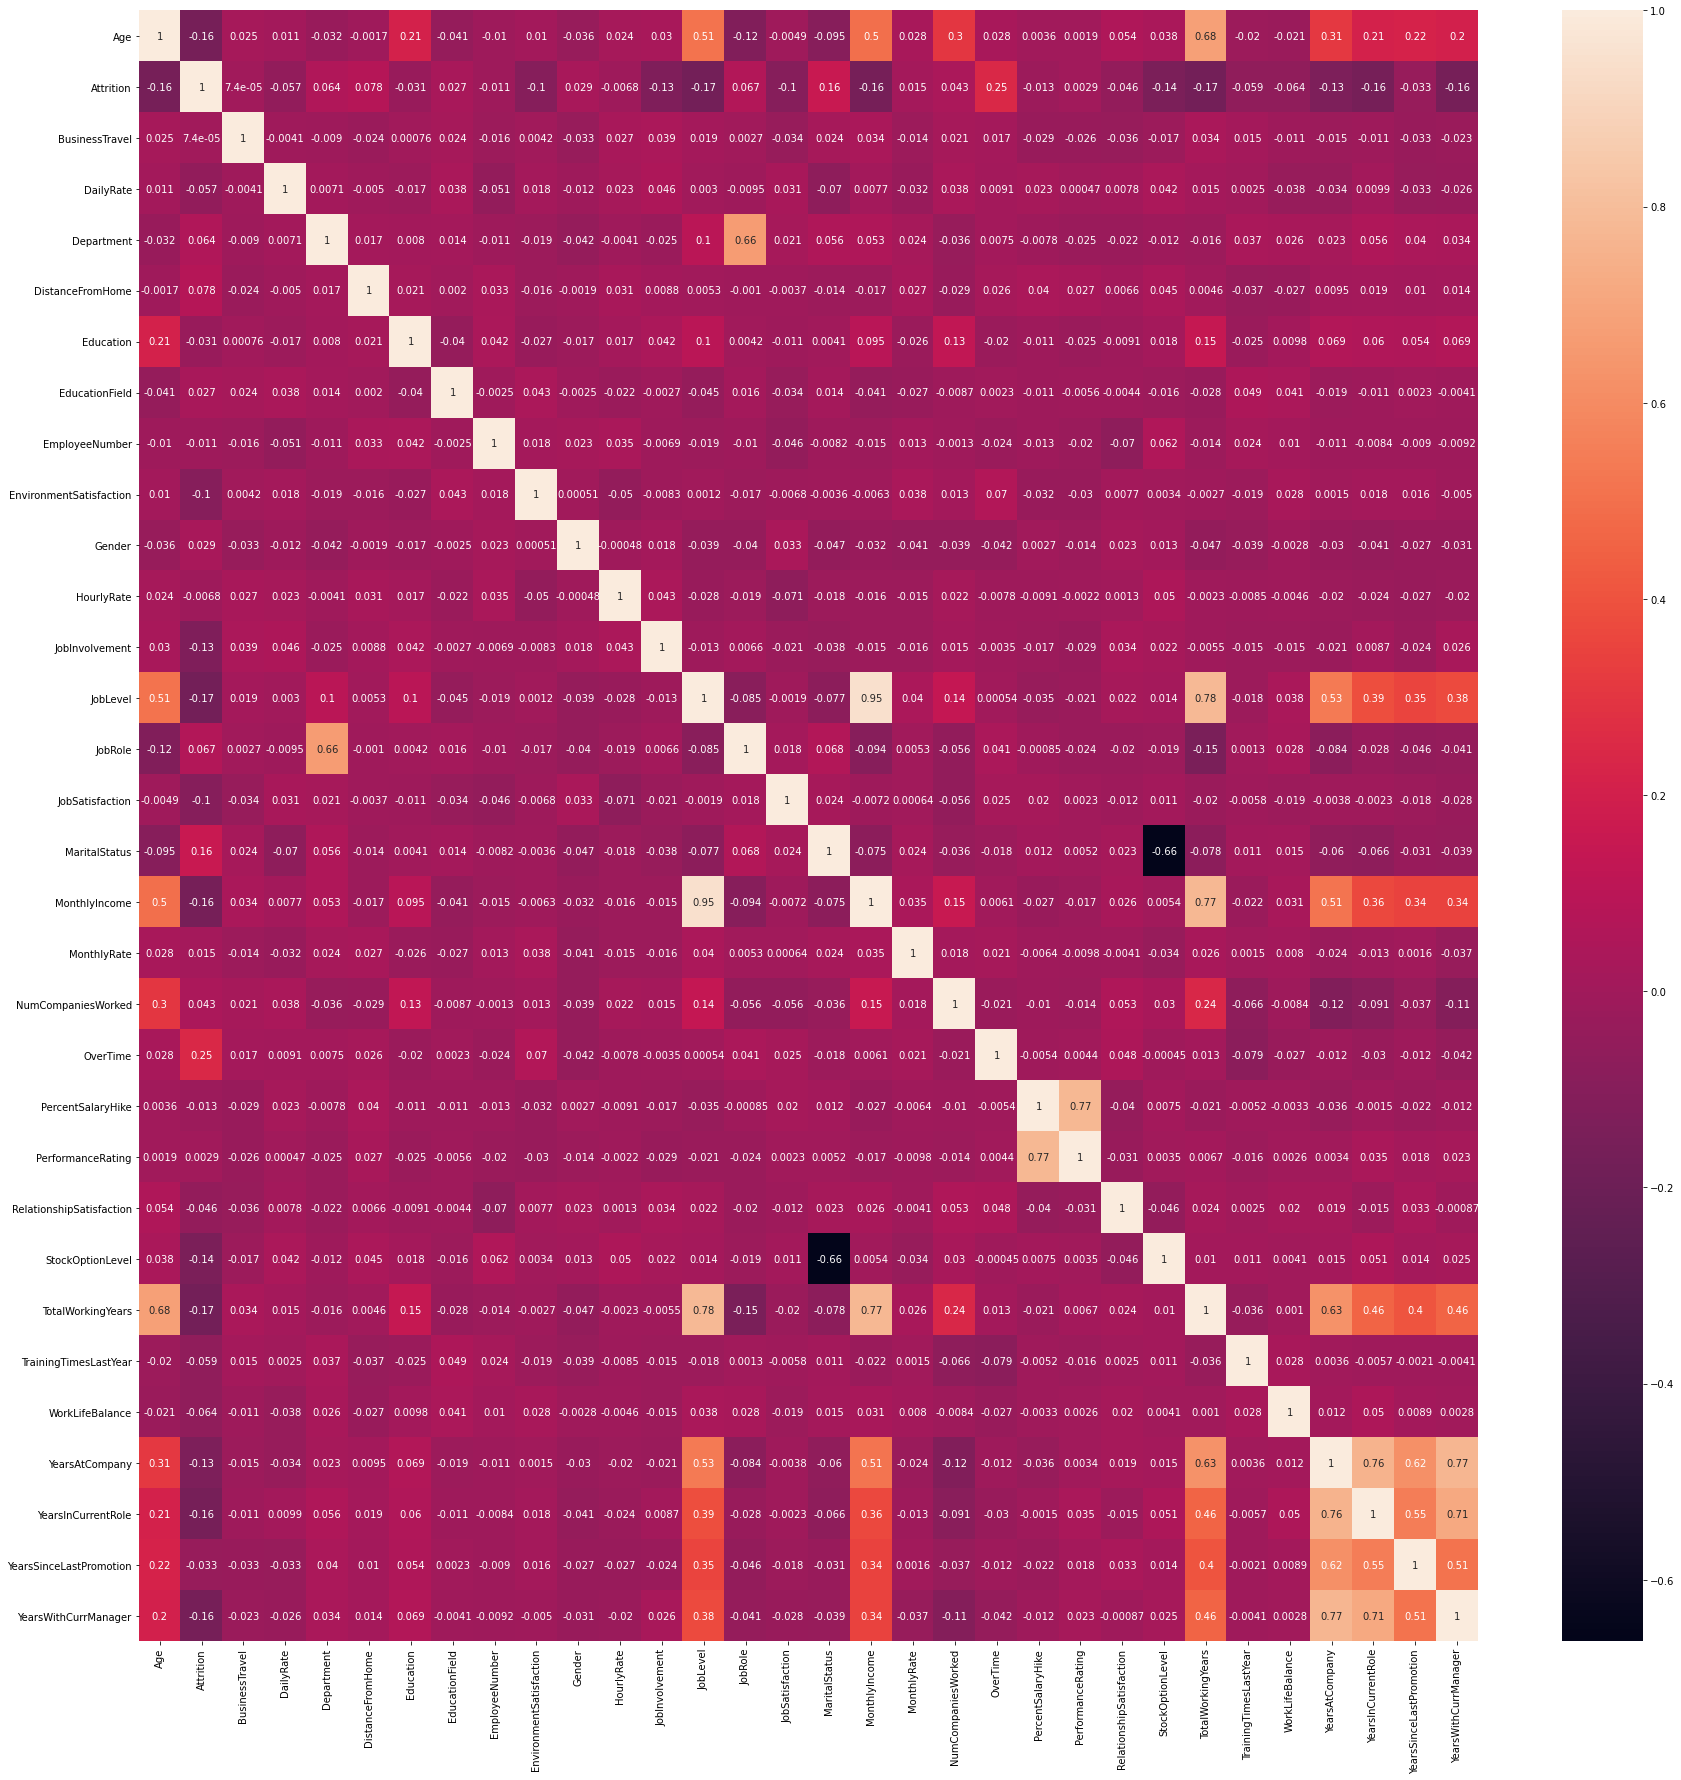

In [105]:
correlation=data_clean.corr(method='pearson')
plt.figure(figsize=(30,30))
sns.heatmap(correlation,annot=True)

In [117]:
df['EmployeeNumber'].value_counts()

2048    1
1368    1
1364    1
1363    1
1362    1
       ..
648     1
647     1
645     1
644     1
2046    1
Name: EmployeeNumber, Length: 1470, dtype: int64

In [330]:
data=data_clean.drop('EmployeeNumber',axis=1)

___Handling class Imbalance

In [331]:

!pip install imbalanced-learn

In [332]:
#Over Sampling the data using SMOTE
from imblearn.over_sampling import SMOTE
os=SMOTE()

SMOTE synthetic over-sampling works to cause the classifier to build larger decision regions that contain nearby minority class points.this will inturn avoid dataloss

In [333]:
x1=data.drop('Attrition',axis=1)
y1=data['Attrition']

In [334]:
x1,y1=over.fit_resample(x1,y1)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

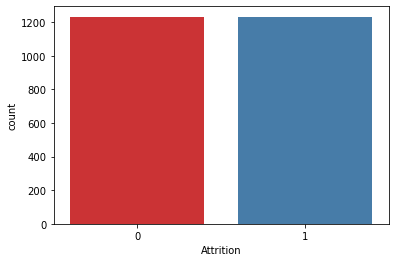

In [335]:
sns.countplot(y1,palette="Set1")

In [336]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled = scaler.fit_transform(x1)

___MODELING

In [337]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn .ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
x=scaled
y=y1

In [338]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

models=[LogisticRegression(),RandomForestClassifier(),BaggingClassifier(),KNeighborsClassifier(),GradientBoostingClassifier(),DecisionTreeClassifier()]
scorelist=[]
acclist=[]

In [339]:
def create_model(model):
    m=model
    m.fit(xtrain,ytrain)
    p=m.predict(xtest)
    score=m.score(xtest,ytest)
    result = confusion_matrix(ytest,p)
    result1 = classification_report(ytest,p)
    result2 = accuracy_score(ytest,p)
    scorelist.append(score)
    acclist.append(result2)
    
    
    print(m,"\n")
    
    print('Accuracy score:',score,"\n")
    print('"Confusion Matrix:\n"',result)
    print('classification_report\n',result1)
    print('Average accuracy_score',result2)
    print('---------------------------------------------------------------------------------------------------------')
for i in models:
    create_model(i)

print('Maximun accuracy Score is shown by',models[acclist.index(max(acclist))],max(acclist))

LogisticRegression() 

Accuracy score: 0.8103727714748784 

"Confusion Matrix:
" [[248  49]
 [ 68 252]]
classification_report
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       297
           1       0.84      0.79      0.81       320

    accuracy                           0.81       617
   macro avg       0.81      0.81      0.81       617
weighted avg       0.81      0.81      0.81       617

Average accuracy_score 0.8103727714748784
---------------------------------------------------------------------------------------------------------
RandomForestClassifier() 

Accuracy score: 0.8865478119935171 

"Confusion Matrix:
" [[278  19]
 [ 51 269]]
classification_report
               precision    recall  f1-score   support

           0       0.84      0.94      0.89       297
           1       0.93      0.84      0.88       320

    accuracy                           0.89       617
   macro avg       0.89      0.89      0.89      

No Skill: ROC AUC=0.500
model: ROC AUC=0.880


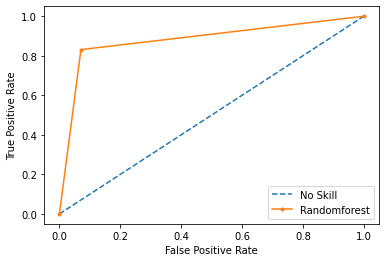

In [340]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)
m=RandomForestClassifier()
m.fit(xtrain,ytrain)
p=m.predict(xtest)
ns_probs = [0 for _ in range(len(ytest))]
m_probs = p
ns_auc = roc_auc_score(ytest, ns_probs)
m_auc = roc_auc_score(ytest, m_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('model: ROC AUC=%.3f' % (m_auc))
ns_fpr, ns_tpr,_= roc_curve(ytest, ns_probs)
m_fpr, m_tpr,_=roc_curve(ytest, m_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(m_fpr, m_tpr, marker='.', label='Randomforest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

___Cross_validation

In [289]:
scorel=[]

In [341]:
lr=LogisticRegression()
scores=cross_val_score(lr,x,y,cv=5)
scorel.append(scores)
scores

array([0.64777328, 0.85801217, 0.83975659, 0.86612576, 0.85801217])

In [342]:
rf=RandomForestClassifier()
scores=cross_val_score(rf,x,y,cv=5)
scorel.append(scores)
scores

array([0.7145749 , 0.95740365, 0.93103448, 0.93103448, 0.94523327])

In [343]:
bg=BaggingClassifier()
scores=cross_val_score(bg,x,y,cv=5)
scorel.append(scores)
scores

array([0.70242915, 0.90669371, 0.91075051, 0.87829615, 0.91075051])

In [344]:
kn=KNeighborsClassifier()
scores=cross_val_score(kn,x,y,cv=5)
scorel.append(scores)
scores

array([0.75910931, 0.84989858, 0.83772819, 0.81744422, 0.81744422])

In [345]:
gb=GradientBoostingClassifier()
scores=cross_val_score(gb,x,y,cv=5)
scorel.append(scores)
scores

array([0.63360324, 0.92089249, 0.90060852, 0.9127789 , 0.92494929])

In [346]:
dt=DecisionTreeClassifier()
scores=cross_val_score(dt,x,y,cv=5)
scorel.append(scores)
scores

array([0.6659919 , 0.81744422, 0.78904665, 0.81135903, 0.831643  ])

___Difference of predicted model and crossvalidation score

In [347]:
models=[LogisticRegression(),RandomForestClassifier(),BaggingClassifier(),KNeighborsClassifier(),GradientBoostingClassifier(),DecisionTreeClassifier()]
for i in range(0,6):
    print(models[i],"difference is",scorel[i]-acclist[i])


LogisticRegression() difference is [-0.15855091  0.06995177  0.045611    0.05980978  0.05980978]
RandomForestClassifier() difference is [-0.16792433  0.02825949  0.03028789  0.04448667  0.05462866]
BaggingClassifier() difference is [-0.14481722  0.06147984  0.03511067  0.04930946  0.04930946]
KNeighborsClassifier() difference is [-0.03588278  0.05089075  0.02046479  0.00626601  0.02654998]
GradientBoostingClassifier() difference is [-0.22216353  0.06110178  0.02661902  0.0428462   0.05501659]
DecisionTreeClassifier() difference is [-0.10711028  0.04841525  0.04841525  0.03218807  0.05247205]


LogisticRegression() difference is 0.05980978
RandomForestClassifier() difference is 0.05462866 
BaggingClassifier() difference is 0.04930946
KNeighborsClassifier() difference is 0.02654998
GradientBoostingClassifier() difference is 0.05501659
DecisionTreeClassifier() difference is 0.05247205


from the observation KNeighborsClassifier() has least difference so I'm selecting KNeighborsClassifier()as best model

__Hyper Tuning

In [226]:
from sklearn.model_selection import GridSearchCV,KFold
params = {
    'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan'],
                'p':[1,2],'leaf_size':list(range(1,20))

}

gs2 = GridSearchCV(KNeighborsClassifier(), params, verbose = 1, cv=3, n_jobs = -1)
gs2.fit(xtrain, ytrain)
print('Best param:', gs2.best_params_)

Fitting 3 folds for each of 1368 candidates, totalling 4104 fits
Best param: {'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


After Hypertuning

In [363]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.25)
model =KNeighborsClassifier(metric='minkowski', n_neighbors=5,weights='distance',p=1,leaf_size=1)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9027552674230146

In [364]:
y_pred_1 = model.predict(x_test)

In [369]:
result = confusion_matrix(y_test, y_pred_1)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred_1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred_1)
print("Accuracy:",result2)

Confusion Matrix:
[[242  53]
 [  7 315]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       295
           1       0.86      0.98      0.91       322

    accuracy                           0.90       617
   macro avg       0.91      0.90      0.90       617
weighted avg       0.91      0.90      0.90       617

Accuracy: 0.9027552674230146


final model after hyper tuning  with accuracy 0.9027552674230146
Best model:KNeighbourClassifier
Best param: {'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

__ROC AUC CURVE

No Skill: ROC AUC=0.500
model: ROC AUC=0.887


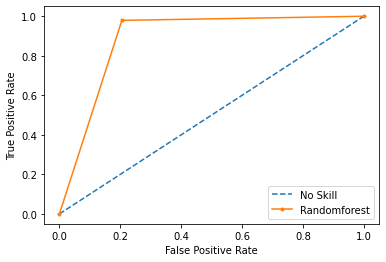

In [397]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.26,random_state=1)
m=KNeighborsClassifier(metric='minkowski', n_neighbors=5,weights='distance',p=1,leaf_size=1)
m.fit(xtrain,ytrain)
p=m.predict(xtest)
ns_probs = [0 for _ in range(len(ytest))]
m_probs = p
ns_auc = roc_auc_score(ytest, ns_probs)
m_auc = roc_auc_score(ytest, m_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('model: ROC AUC=%.3f' % (m_auc))
ns_fpr, ns_tpr,_= roc_curve(ytest, ns_probs)
m_fpr, m_tpr,_=roc_curve(ytest, m_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(m_fpr, m_tpr, marker='.', label='Randomforest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [398]:
from joblib import dump
dump(model, 'model_hr.joblib')

['model_hr.joblib']

In [399]:
from joblib import load
loaded = load('model_hr.joblib')